# Display results of analysis

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

df = pd.read_csv('../results/summary.csv')
df = df.set_index('name')
df

,total_words,distinct_words,alpha,C
name,,,,
Oxirzamon nishonalari,64041,17911,0.720879,52.098340
Oʻtgan kunlar,88427,22471,0.714039,58.448121
Tom Soyer...,62184,14760,0.750059,40.632605


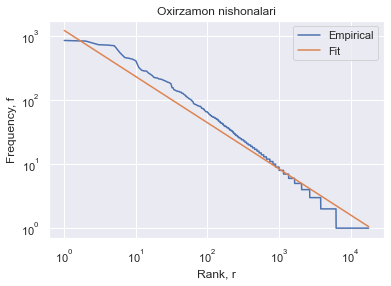

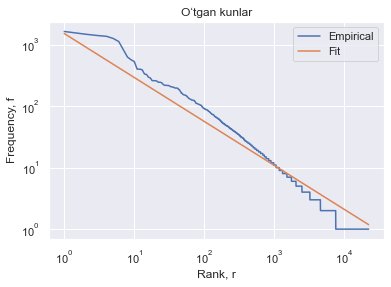

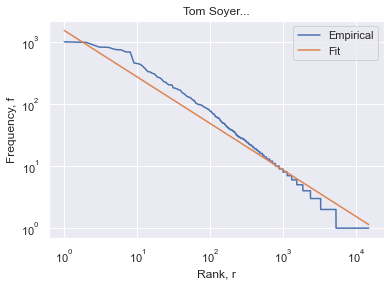

In [19]:
most_common = {}
for book, row in df.iterrows():
    plt.figure()
    df_c = pd.read_csv(f'../results/raw_counts/{book}.csv')
    rank = np.arange(df_c.shape[0]) + 1
    plt.loglog(rank, df_c.freq)
    plt.loglog(rank, df_c.freq.sum() / row.C * rank ** (-row.alpha) )
    plt.xlabel('Rank, r')
    plt.ylabel('Frequency, f')
    plt.title(book)
    plt.legend(['Empirical', 'Fit'])
    plt.show()
    most_common[book] = df_c.word[:10].values

In [20]:
# Show most common words for each text
pd.DataFrame(most_common)

,Oxirzamon nishonalari,Oʻtgan kunlar,Tom Soyer...
0,va,ham,ham
1,ham,bir,edi
2,bilan,va,u
3,edi,edi,bir
4,bu,bu,bilan
5,men,bilan,va
6,bir,dedi,tom
7,uchun,otabek,bu
8,u,deb,shu
9,shu,uchun,uning
